# Two-Photon Inteference (HOM Effect)

In [7]:
# Necessary Imports
import fotini as fi
from math import sqrt
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict

In [8]:
# Specify the setup. We have an extremely simple set-up
# One beam splitter, not connected to anything else
bs = fi.BeamSplitter(1/sqrt(2), 1j/sqrt(2))
setup = fi.Setup(nodes={0:bs}, edges={})

In [9]:
# First photon always arrives at time 0
φ_1 = fi.GaussianPhoton(ω_0=1e3, Δ=1, t_0=0, n=1)
probs = defaultdict(list)
ts = np.linspace(-5, 5, 250)

norms = []
for t in tn.tqdm(ts):
    # Second photon arrives at variable time
    φ_2 = fi.GaussianPhoton(ω_0=1e3, Δ=1, t_0=t, n=1)
    photon_inputs = [(φ_1, (0, 0)), (φ_2, (0, 1))]
    # Ask the set-up to calculate the probability of each output case
    cp = setup.calculate(photon_inputs)

    for k, v in cp.items():
        probs[k].append(v)

  0%|          | 0/250 [00:00<?, ?it/s]

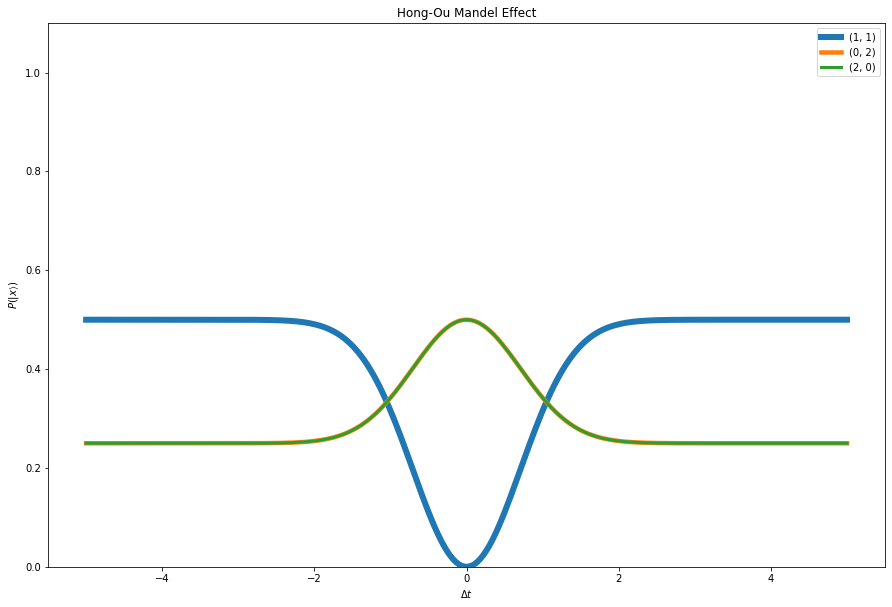

In [10]:
# Plot the output cases
plt.figure(figsize=(15, 10))

for i, (k, p) in zip(range(len(probs), -1, -1), probs.items()):
    plt.plot(ts, p, label=f'{k}', linewidth=1.5*(i+1))
plt.title('Hong-Ou Mandel Effect')
plt.ylim(0, 1.1)
plt.xlabel('$\\Delta t$')
plt.ylabel('$P(|x〉)$')
plt.legend()
plt.show()

# Mach-Zender Interferometer

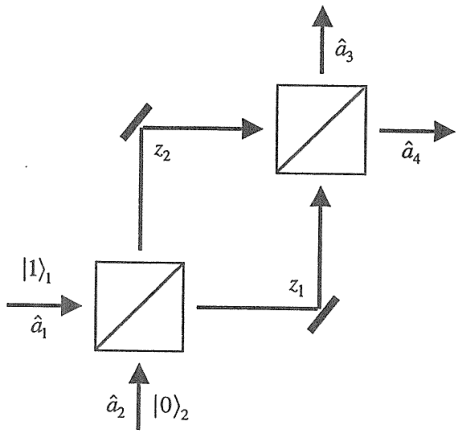

In [11]:
bs = fi.BeamSplitter(1/sqrt(2), 1j/sqrt(2))
# We have two symmetric beamsplitters
nodes = {0:bs, 1:bs}

In [21]:
probs = defaultdict(list)
N_SAMPLES = 1000
distances = np.linspace(0, 6e-8, N_SAMPLES)
for distance in tqdm(distances):
    edges = {0:{
        0:(1, 1, 1e-6*fi.Setup.c),  # We keep z_1 fixed
        1:(1, 0, distance*fi.Setup.c) # We vary z_2
    }
    setup = fi.Setup(nodes=nodes, edges=edges)
    φ = fi.GaussianPhoton(ω_0=1e9, Δ=1, t_0=0, n=1)
    photon_inputs = [(φ, (0, 0))]

    cp = setup.calculate(photon_inputs)

    for k, v in cp.items():
        probs[k].append(v)



  0%|          | 0/1000 [00:00<?, ?it/s]

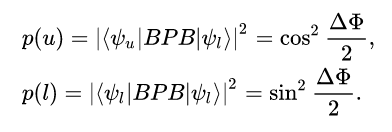

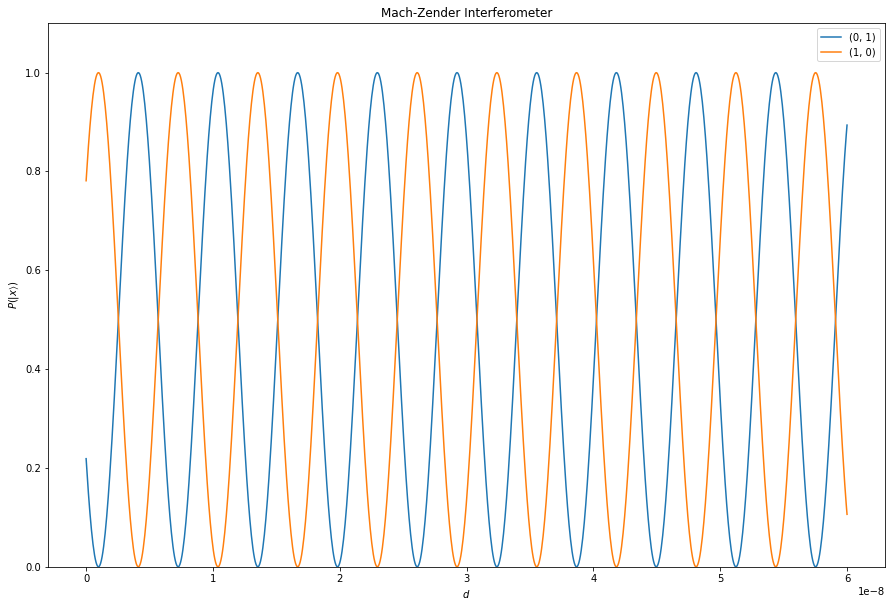

In [22]:
plt.figure(figsize=(15, 10))
for k, p in probs.items():
    plt.plot(distances, p, label=f'{k}')

plt.title('Mach-Zender Interferometer')
plt.ylim(0, 1.1)
plt.xlabel('$d$')
plt.ylabel('$P(|x〉)$')
plt.legend()
plt.show()